In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

from fredapi import Fred
fred = Fred(api_key='3ddb1f6991ad9fb5f0afad664be60280')
#API key removed from Github copy

In [50]:
#Pull the indixes -- note that the last two needed further work on dates before transposing
CS_HPA_20_cities= pd.DataFrame(fred.get_series('SPCS20RSA')).T
CS_HP =pd.DataFrame(fred.get_series('CSUSHPISA')).T
UNEMPLOY = pd.DataFrame(fred.get_series('UNRATENSA')).T
LF_Part = pd.DataFrame(fred.get_series('CIVPART')).T
Y10_CMT = pd.DataFrame(fred.get_series('DGS10'))
Y30_fixed_mortgage_rate=pd.DataFrame(fred.get_series('MORTGAGE30US'))

In [51]:
##This section to fix Y10_CMT date -- there must be a better way! *******

In [52]:
Y10_CMT = Y10_CMT.resample('M').mean().fillna(0)

In [53]:
Y10_CMT['new_year'] =Y10_CMT.index.year 
Y10_CMT['new_month'] =Y10_CMT.index.month
Y10_CMT['new_day']=1

In [54]:
cols = ['new_year', 'new_month', 'new_day']
Y10_CMT['new_date'] = Y10_CMT[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

In [55]:
Y10_CMT['new_date'] =pd.to_datetime(Y10_CMT['new_date'])

In [56]:
Y10_CMT['new_date']

1962-01-31   1962-01-01
1962-02-28   1962-02-01
1962-03-31   1962-03-01
1962-04-30   1962-04-01
1962-05-31   1962-05-01
                ...    
2021-04-30   2021-04-01
2021-05-31   2021-05-01
2021-06-30   2021-06-01
2021-07-31   2021-07-01
2021-08-31   2021-08-01
Freq: M, Name: new_date, Length: 716, dtype: datetime64[ns]

In [57]:
Y10_CMT.set_index('new_date',inplace=True)

In [58]:
Y10_CMT=Y10_CMT[0]

In [59]:
Y10_CMT

new_date
1962-01-01    4.083182
1962-02-01    4.039444
1962-03-01    3.930455
1962-04-01    3.843000
1962-05-01    3.873636
                ...   
2021-04-01    1.635000
2021-05-01    1.621000
2021-06-01    1.519091
2021-07-01    1.318571
2021-08-01    1.282000
Name: 0, Length: 716, dtype: float64

In [60]:
Y10_CMT=Y10_CMT.T

In [61]:
#This section to fix Y30_fixed_mortgage_rate date -- there must be a better way! *******

In [62]:
Y30_fixed_mortgage_rate = Y30_fixed_mortgage_rate.resample('M').mean().fillna(0)

In [63]:
Y30_fixed_mortgage_rate['new_year'] =Y30_fixed_mortgage_rate.index.year 
Y30_fixed_mortgage_rate['new_month'] =Y30_fixed_mortgage_rate.index.month
Y30_fixed_mortgage_rate['new_day']=1

In [64]:
cols = ['new_year', 'new_month', 'new_day']
Y30_fixed_mortgage_rate['new_date'] = Y30_fixed_mortgage_rate[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

In [65]:
Y30_fixed_mortgage_rate['new_date'] =pd.to_datetime(Y30_fixed_mortgage_rate['new_date'])

In [66]:
Y30_fixed_mortgage_rate['new_date']

1971-04-30   1971-04-01
1971-05-31   1971-05-01
1971-06-30   1971-06-01
1971-07-31   1971-07-01
1971-08-31   1971-08-01
                ...    
2021-04-30   2021-04-01
2021-05-31   2021-05-01
2021-06-30   2021-06-01
2021-07-31   2021-07-01
2021-08-31   2021-08-01
Freq: M, Name: new_date, Length: 605, dtype: datetime64[ns]

In [67]:
Y30_fixed_mortgage_rate.set_index('new_date',inplace=True)

In [68]:
Y30_fixed_mortgage_rate=Y30_fixed_mortgage_rate[0]

In [69]:
Y30_fixed_mortgage_rate

new_date
1971-04-01    7.3100
1971-05-01    7.4250
1971-06-01    7.5300
1971-07-01    7.6040
1971-08-01    7.6975
               ...  
2021-04-01    3.0600
2021-05-01    2.9625
2021-06-01    2.9750
2021-07-01    2.8680
2021-08-01    2.8425
Name: 0, Length: 605, dtype: float64

In [70]:
Y30_fixed_mortgage_rate=Y30_fixed_mortgage_rate.T

In [71]:
##End of the date fixes

In [72]:
#Preparing to constructing data frame for macro data
macro_index_list =[CS_HPA_20_cities,CS_HP,UNEMPLOY,LF_Part,Y10_CMT,Y30_fixed_mortgage_rate]
macro_index_labels =['CS_HPA_20_cities','CS_HP','UNEMPLOY','LF_Part','Y10_CMT','Y30_fixed_mortgage_rate']

In [73]:
macro_data =pd.DataFrame()
macro_data=macro_data.fillna(0)

In [74]:
#Appending all the indices to data frame - Note cannot include all appends in single ccell
macro_data = macro_data.append(CS_HPA_20_cities)

In [75]:
macro_data = macro_data.append(CS_HP)

In [76]:
macro_data = macro_data.append(UNEMPLOY)

In [77]:
macro_data = macro_data.append(LF_Part)

In [78]:
macro_data = macro_data.append(Y10_CMT)

In [79]:
macro_data = macro_data.append(Y30_fixed_mortgage_rate)

In [80]:
#Adding index labels to data frame
macro_data.index=macro_index_labels

In [81]:
#Deleting unneccessary history
macro_data=macro_data.loc[:,"2000-1-01":"2020-12-01"]

In [82]:
macro_data=macro_data.T

In [83]:
macro_data.index.names = ["Date"]

In [84]:
macro_data.to_csv('C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/testEDA.csv')

In [85]:
macro_data=macro_data.reset_index()

In [86]:
macro_data

,Date,CS_HPA_20_cities,CS_HP,UNEMPLOY,LF_Part,Y10_CMT,Y30_fixed_mortgage_rate
0,2000-01-01,100.589697,100.552,4.5,67.3,6.661000,8.2100
1,2000-02-01,101.692479,101.339,4.4,67.3,6.519500,8.3250
2,2000-03-01,102.783829,102.127,4.3,67.3,6.256522,8.2400
3,2000-04-01,103.996444,102.922,3.7,67.3,5.990526,8.1525
4,2000-05-01,105.252818,103.677,3.8,67.1,6.440455,8.5150
...,...,...,...,...,...,...,...
247,2020-08-01,228.775633,222.735,8.5,61.7,0.650000,2.9350
248,2020-09-01,232.156469,225.954,7.7,61.4,0.679524,2.8900
249,2020-10-01,235.771350,229.442,6.6,61.6,0.787143,2.8340
250,2020-11-01,239.098649,232.656,6.4,61.5,0.870000,2.7650


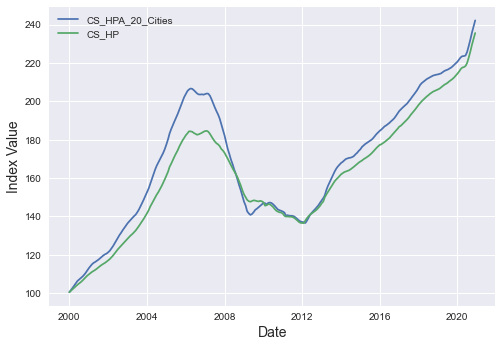

In [97]:
plt.plot(macro_data["Date"],macro_data['CS_HPA_20_cities'],label = "CS_HPA_20_Cities")
plt.plot(macro_data["Date"],macro_data['CS_HP'],label = "CS_HP")
plt.xlabel('Date', fontsize=14)
plt.ylabel('Index Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

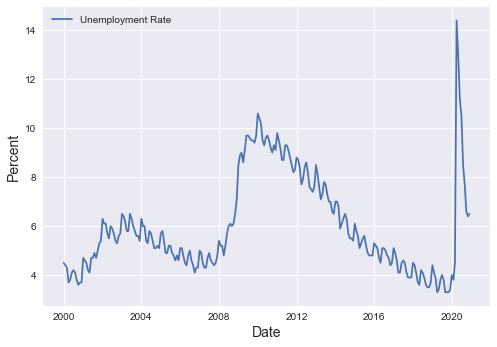

In [98]:
plt.plot(macro_data["Date"],macro_data['UNEMPLOY'],label = "Unemployment Rate")
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percent', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

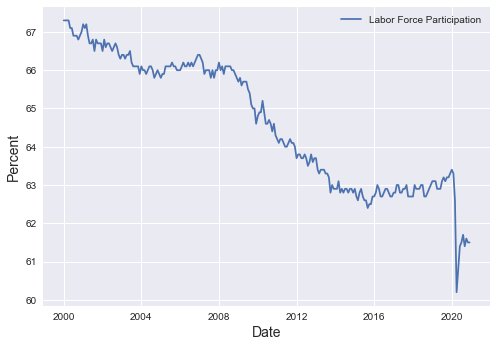

In [99]:
plt.plot(macro_data["Date"],macro_data['LF_Part'],label = "Labor Force Participation")
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percent', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

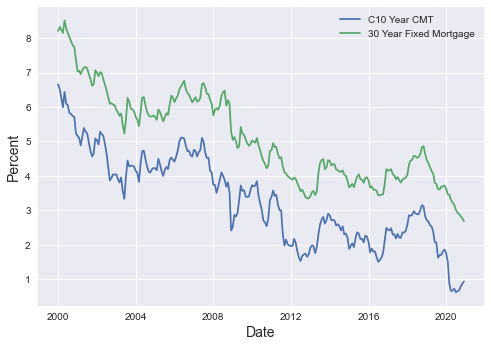

In [100]:
plt.plot(macro_data["Date"],macro_data['Y10_CMT'],label = "C10 Year CMT")
plt.plot(macro_data["Date"],macro_data['Y30_fixed_mortgage_rate'],label = "30 Year Fixed Mortgage")
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percent', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

<AxesSubplot:>

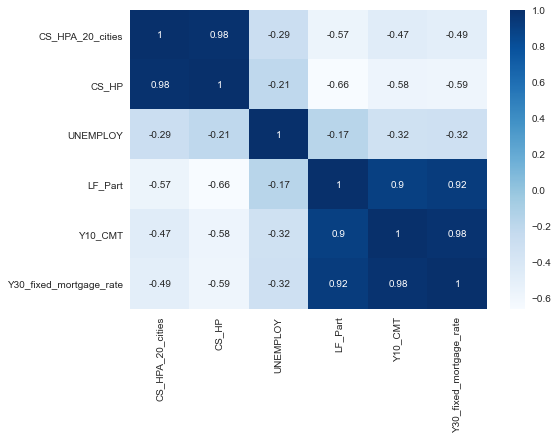

In [102]:
import seaborn as sb
corr = macro_data.corr()
sb.heatmap(corr, cmap="Blues", annot=True)